  top-left-square top-middle-square top-right-square middle-left-square  \
0               x                 x                x                  x   
1               x                 x                x                  x   
2               x                 x                x                  x   
3               x                 x                x                  x   
4               x                 x                x                  x   

  middle-middle-square middle-right-square bottom-left-square  \
0                    o                   o                  x   
1                    o                   o                  o   
2                    o                   o                  o   
3                    o                   o                  o   
4                    o                   o                  b   

  bottom-middle-square bottom-right-square    target  
0                    o                   o  positive  
1                    x                   o  posi

/tmp/ipython-input-1776460077.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='pastel', ax=ax)
/tmp/ipython-input-1776460077.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='pastel', ax=ax)
/tmp/ipython-input-1776460077.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='pastel', ax=ax)
/tmp/ipython-input-1776460077.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to 

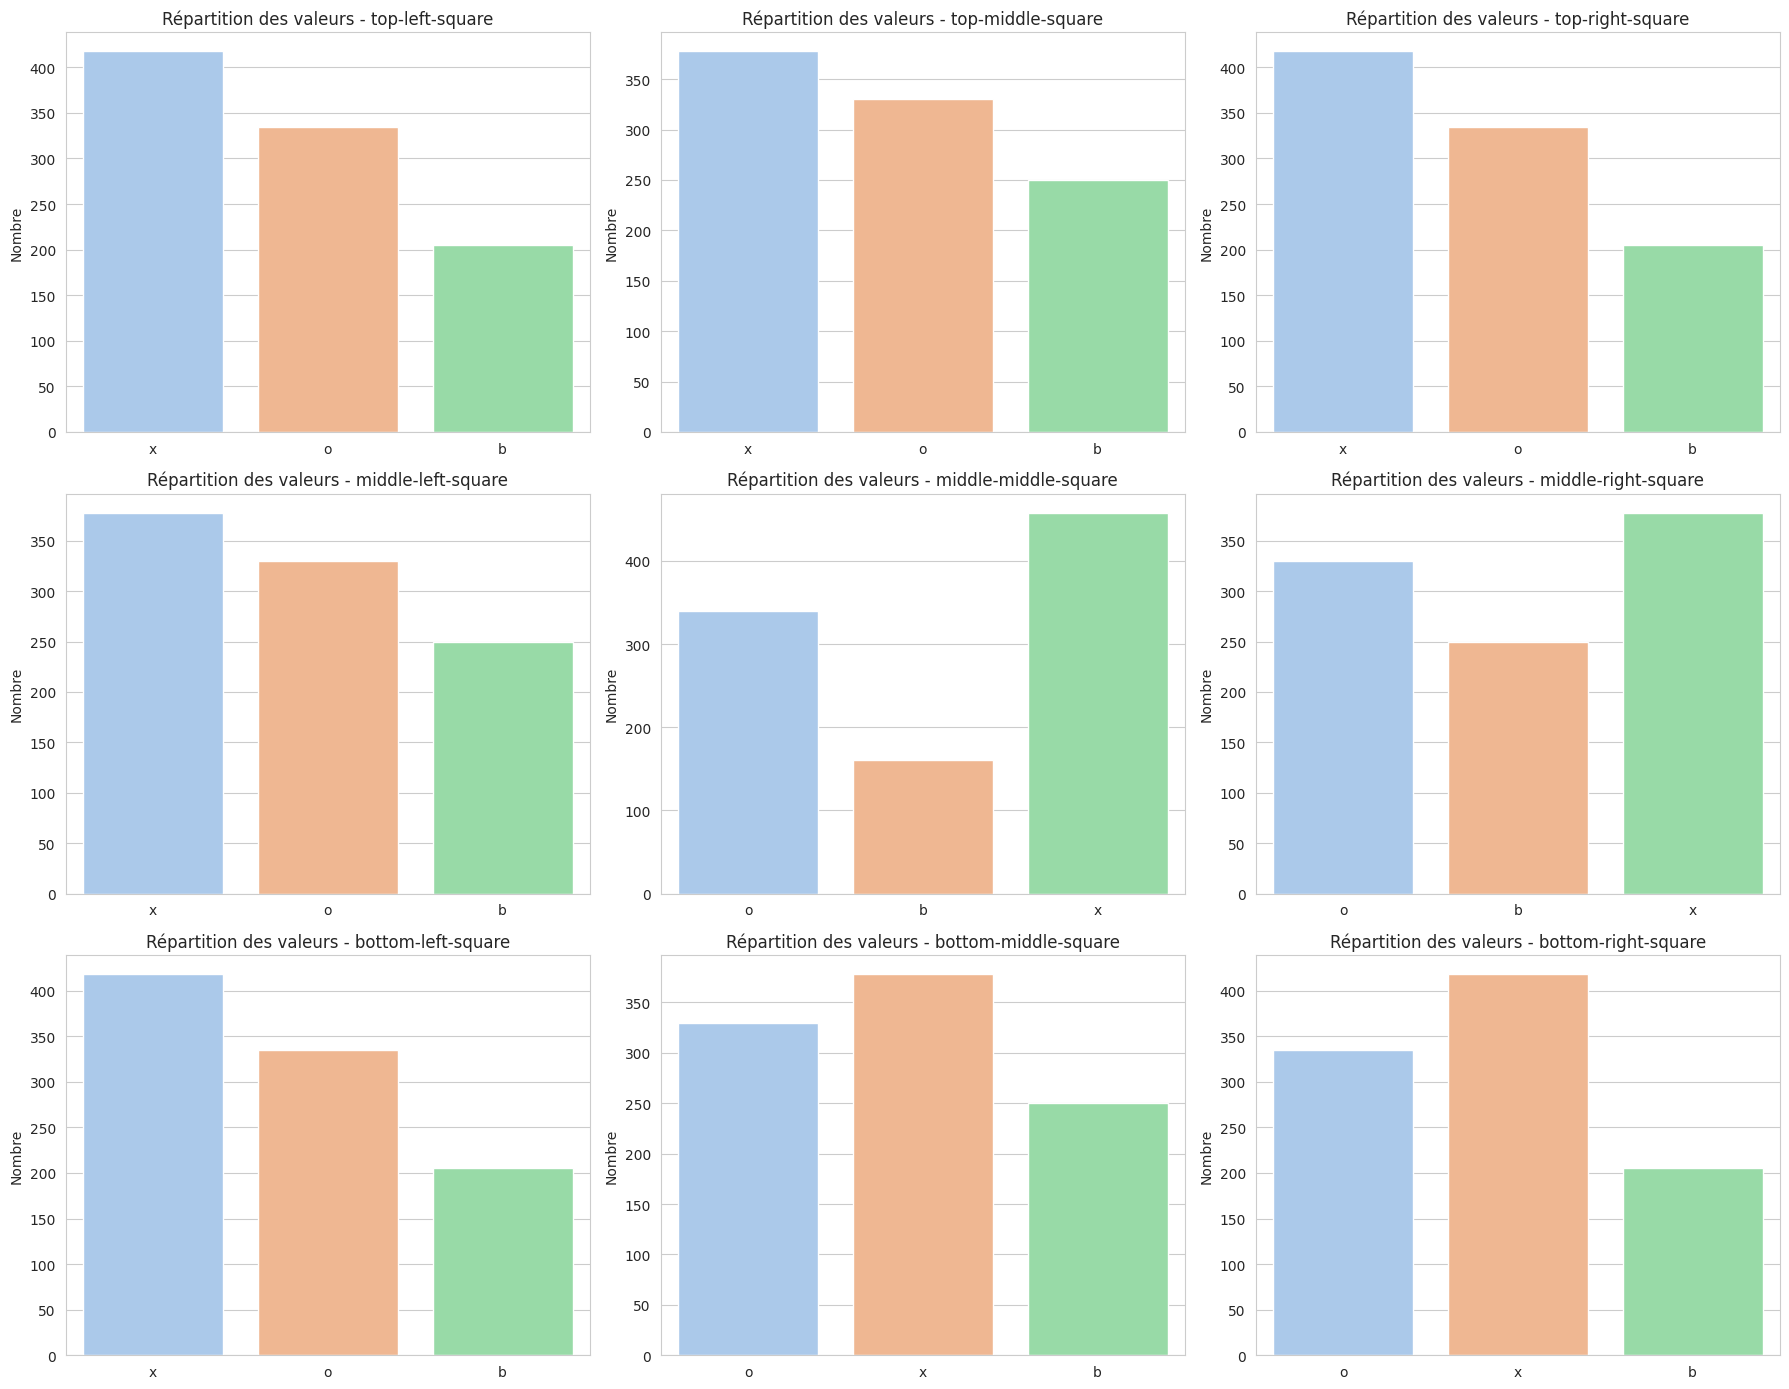

/tmp/ipython-input-1776460077.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=df, palette='Set2')


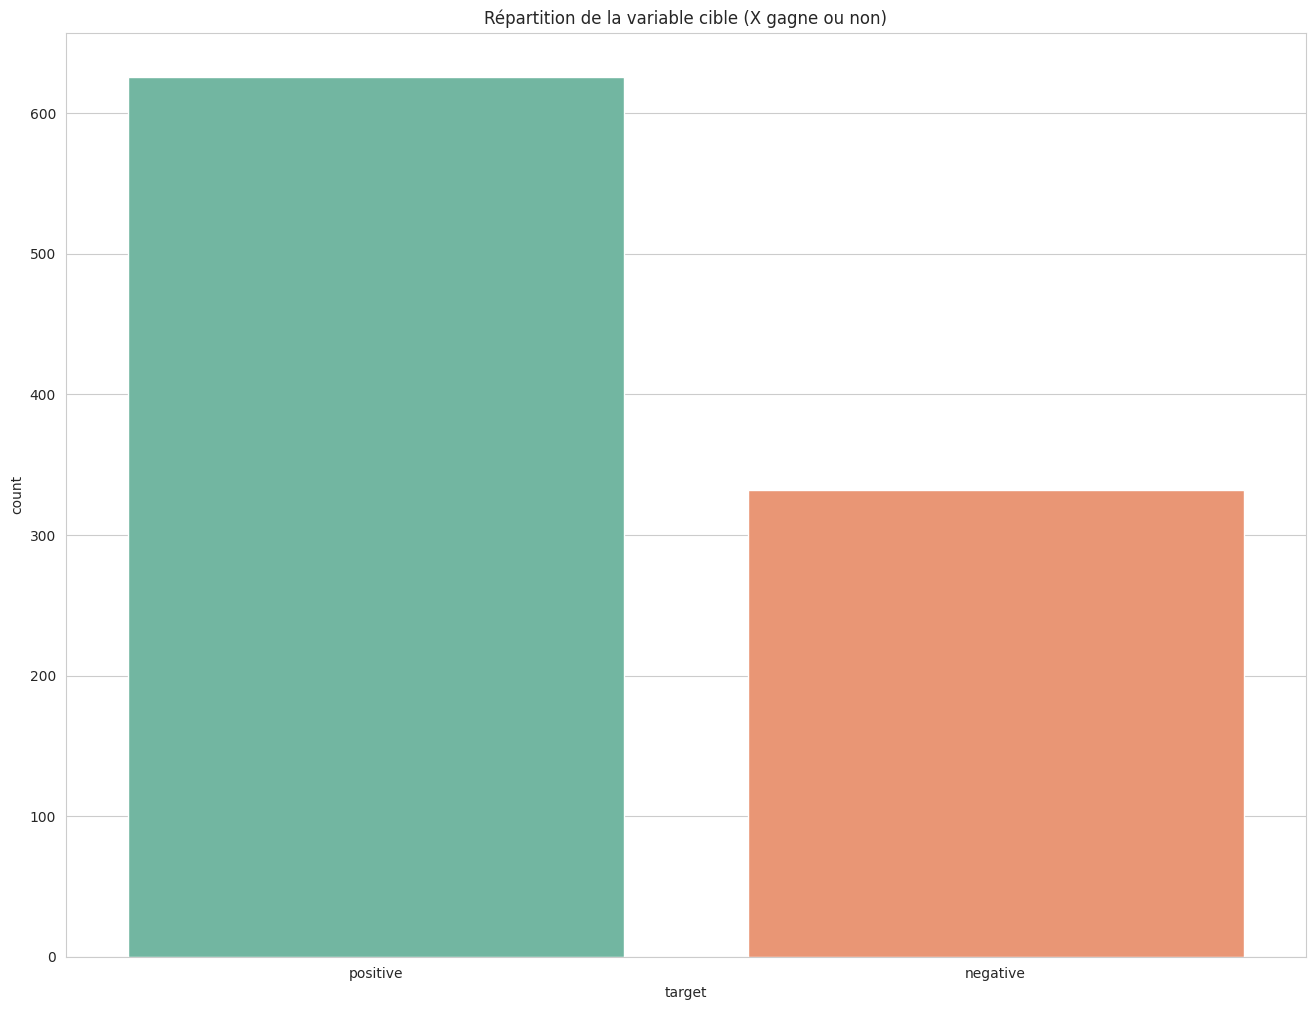

/tmp/ipython-input-1776460077.py:59: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_encoded = df.replace({'x':1, 'o':-1, 'b':0})  # encoder les valeurs pour visualisation


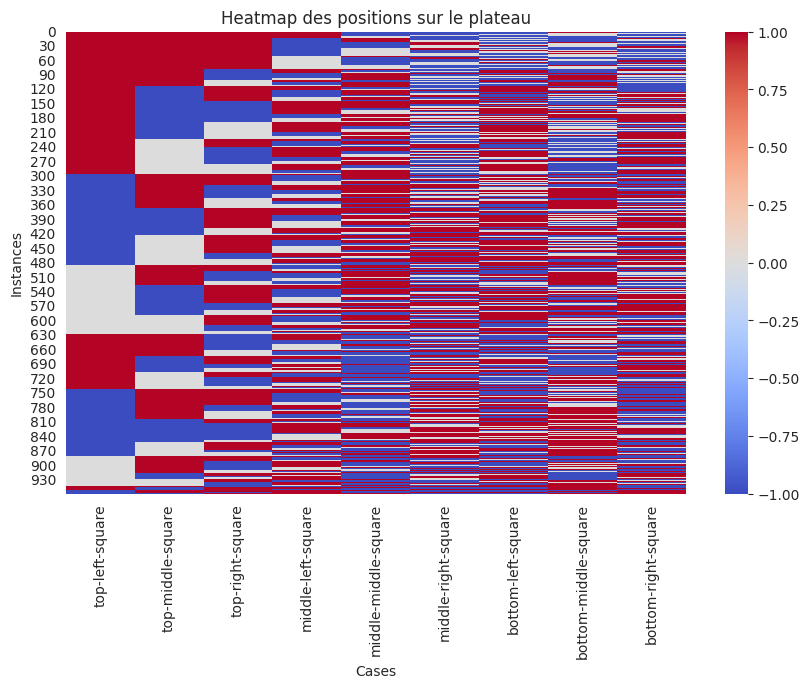

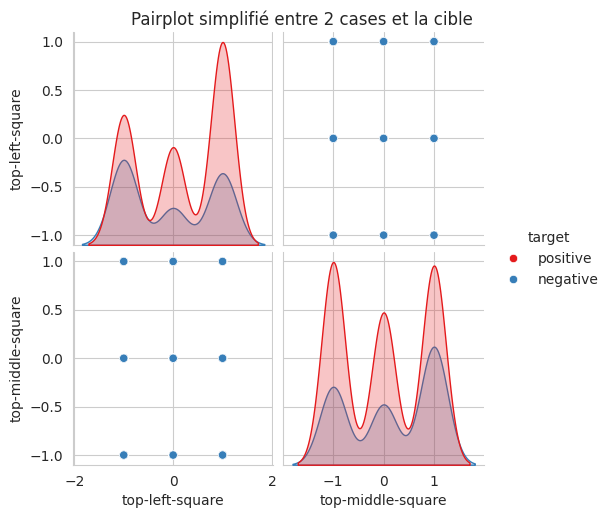

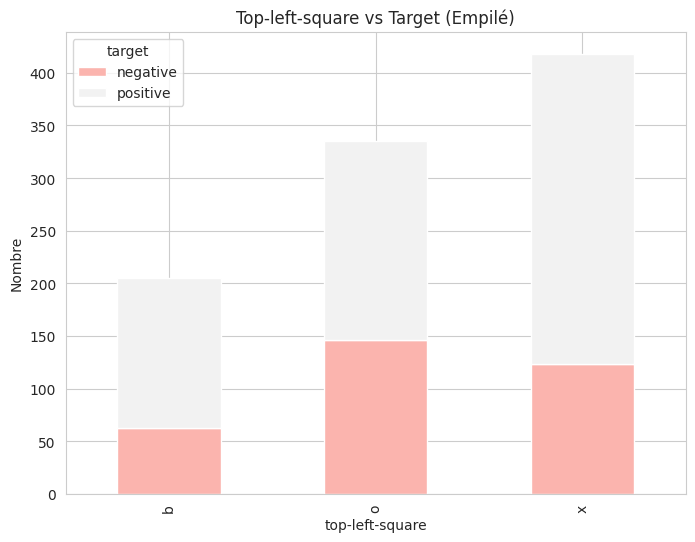

In [2]:
# Installer la librairie si nécessaire
!pip install ucimlrepo

# Import des librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo

# -----------------------------
# 1. Charger le dataset
# -----------------------------
tic_tac_toe_endgame = fetch_ucirepo(id=101)

X = tic_tac_toe_endgame.data.features
y = tic_tac_toe_endgame.data.targets

df = pd.concat([X, y], axis=1)
df.rename(columns={df.columns[-1]: 'target'}, inplace=True)

# -----------------------------
# 2. Informations sur le dataset
# -----------------------------
print(df.head())
print(df.info())
print(df.describe(include='all'))

# -----------------------------
# 3. Diagrammes par colonne
# -----------------------------
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (16, 12)

fig, axes = plt.subplots(3, 3, figsize=(18, 14))

for i, col in enumerate(X.columns):
    ax = axes[i//3, i%3]
    sns.countplot(x=col, data=df, palette='pastel', ax=ax)
    ax.set_title(f"Répartition des valeurs - {col}")
    ax.set_xlabel('')
    ax.set_ylabel('Nombre')

plt.tight_layout()
plt.show()

# -----------------------------
# 4. Diagramme de la variable cible
# -----------------------------
sns.countplot(x='target', data=df, palette='Set2')
plt.title("Répartition de la variable cible (X gagne ou non)")
plt.show()

# -----------------------------
# 5. Diagrammes supplémentaires
# -----------------------------

# a) Heatmap pour voir la fréquence des cases par valeur
df_encoded = df.replace({'x':1, 'o':-1, 'b':0})  # encoder les valeurs pour visualisation
plt.figure(figsize=(10,6))
sns.heatmap(df_encoded[X.columns].astype(int), cmap='coolwarm', cbar=True)
plt.title("Heatmap des positions sur le plateau")
plt.xlabel("Cases")
plt.ylabel("Instances")
plt.show()

# b) Pairplot simplifié pour visualiser certaines relations
sns.pairplot(df_encoded[[X.columns[0], X.columns[1], 'target']], hue='target', palette='Set1')
plt.suptitle("Pairplot simplifié entre 2 cases et la cible", y=1.02)
plt.show()

# c) Diagramme en barre empilé pour top-left-square vs target
cross_tab = pd.crosstab(df['top-left-square'], df['target'])
cross_tab.plot(kind='bar', stacked=True, colormap='Pastel1', figsize=(8,6))
plt.title("Top-left-square vs Target (Empilé)")
plt.ylabel("Nombre")
plt.show()
